In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
import seaborn as sns

C:\Users\susha\AppData\Local\Temp\ipykernel_19804\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

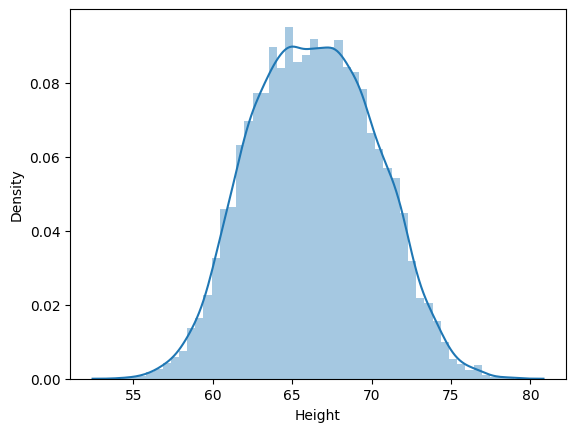

In [7]:
sns.distplot(df['Height'])

<Axes: xlabel='Height'>

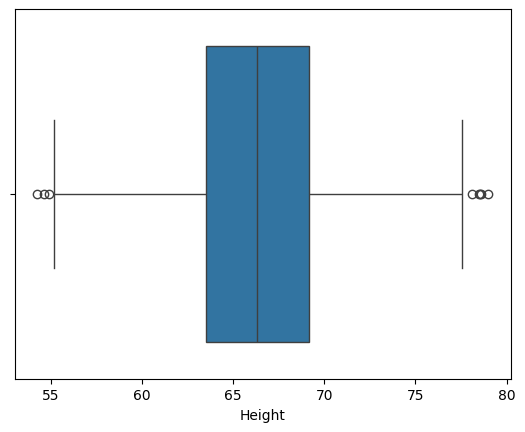

In [8]:
sns.boxplot(df['Height'], orient='h')

In [9]:
# here quantile percentile we decided
upper_limit = df['Height'].quantile(0.99)
print("upper_limit: ", upper_limit)

# here we  need to same difference percentile created in upper_limit and lower_limit
lower_limit = df['Height'].quantile(0.01)
print("lower_limit : ", lower_limit)

upper_limit:  74.7857900583366
lower_limit :  58.13441158671655


### Trimming

In [10]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [12]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\susha\AppData\Local\Temp\ipykernel_19804\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

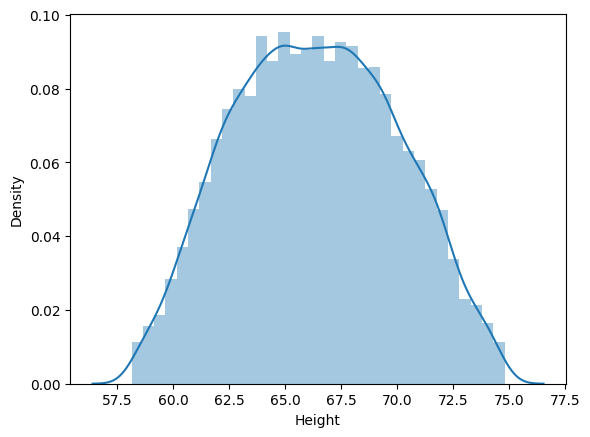

In [13]:
sns.distplot(new_df['Height'])

<Axes: xlabel='Height'>

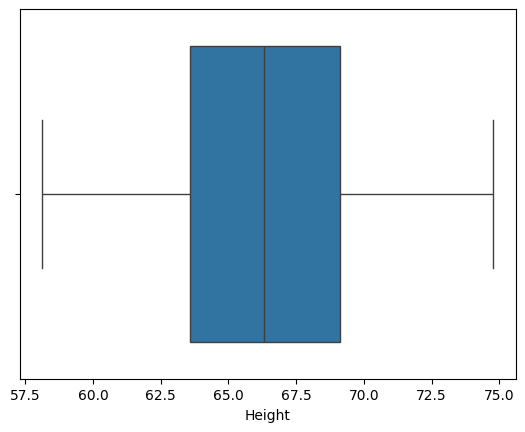

In [14]:
sns.boxplot(new_df['Height'], orient='h')

### Capping ( Winsorization method)

In percentile method there are two types Trimming & Capping (winsorization).
The percentile method capping type is a also called 'Winsorization'

In [15]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit+1,
        np.where(df['Height'] <= lower_limit,
                lower_limit+1,
                df["Height"]))

In [16]:
df.shape

(10000, 3)

In [17]:
df['Height'].describe()

count    10000.000000
mean        66.386281
std          3.798793
min         58.134496
25%         63.505620
50%         66.318070
75%         69.174262
max         75.785790
Name: Height, dtype: float64

C:\Users\susha\AppData\Local\Temp\ipykernel_19804\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

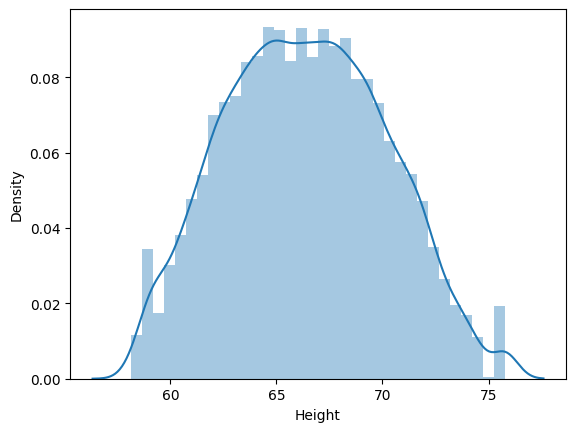

In [18]:
sns.distplot(df['Height'])

<Axes: xlabel='Height'>

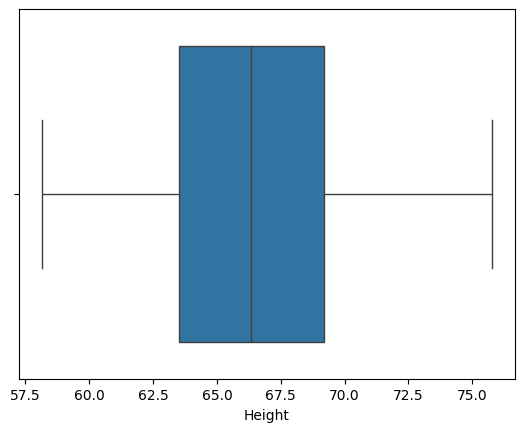

In [19]:
sns.boxplot(df['Height'], orient='h')